PTH figure 1
=======
This notebook creates figure 1 of PTH from zero.


In [1]:
# Some boiler-plate to get us going
%matplotlib inline
from IPython.display import FileLink, FileLinks, display
import numpy as np
from numpy.random import RandomState
from numpy import pi, sin
from scipy import linalg
from matplotlib import patches, rc, pyplot as plt
latex_width_inch = 3.4 ## (aps single column)
latex_height_inch = latex_width_inch * (np.sqrt(5)-1.0)/2.0 # golden ratio
rc('figure', figsize=[2* latex_width_inch, latex_height_inch])
rc('figure.subplot', left=0.1, right=0.95, top=0.9, bottom=0.2)
rc('legend', fontsize='smaller')
rc('xtick', labelsize='smaller')
rc('ytick', labelsize='smaller')



In [2]:
# define some functions for later
def band(N,bandwidth):
    return np.triu(np.tri(N, k=bandwidth)*np.tri(N,k=bandwidth).T +
                   np.tri(N, k=(bandwidth-N)) + np.tri(N,k=(bandwidth-N)).T
                   , k=1)
def symmetrize_and_conserve(in_matrix):
    out = in_matrix + in_matrix.T
    np.fill_diagonal(out, -out.sum(axis=1))
    return out

def sorted_eigh(in_matrix):
    eigvals, eigvecs = linalg.eigh(in_matrix)
    sort_indices = np.argsort(eigvals)
    return eigvals[sort_indices[::-1]], eigvecs[:,sort_indices[::-1]]

def pth_mat(N,b,ep):
    prng = RandomState(7) # 7 was randomly selected https://xkcd.com/221/
    A = np.zeros([N,N])
    where_to_fill = band(N, b)
    values = np.linspace(1-ep, 1+ep, where_to_fill.sum(axis=None))
    A[where_to_fill==1] = prng.permutation(values)
    return symmetrize_and_conserve(A)

def pth_PN_and_ev(N,b,ep):
    eival, eivec = sorted_eigh(pth_mat(N,b,ep))
    PN = (eivec**4).sum(axis=0)**(-1)
    return PN, eival
    
def get_branch_extents(b):
    """ numerically find the branching extents"""
    # quite ugly
    Ns = 1000 # hope that's enough
    x = np.linspace(1e-4,pi - 1e-4,Ns)
    y = (1+2*b) - np.sin((0.5 + b)* x ) / np.sin(0.5*x)
    q = np.diff(np.sign(np.diff(y))) # the sign flips of the derivatives.
    
    assert (np.count_nonzero(q)== b-1)
    all_sign_flips = np.append(q.nonzero(),-1) # add the end at end
    if b % 2 ==1:
        #  add the 0 to first point if b is not even
        all_sign_flips = np.insert(all_sign_flips,0,0)
    return y[all_sign_flips]

In [3]:
# Actually run, and get the data!
b = 5
PN01, ev01 = pth_PN_and_ev(1000,b,0.1)
PN05, ev05 = pth_PN_and_ev(1000,b,0.5)
PN10, ev10 = pth_PN_and_ev(1000,b,1.0)

/data/jarondl/2git/PROJ/PROG/PTH/PTH_figure_01.eps

/data/jarondl/2git/PROJ/PROG/PTH/PTH_figure_01.pdf

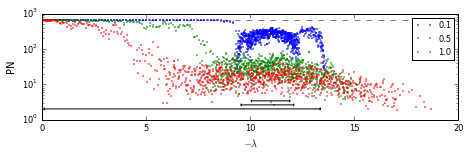

In [4]:
# plot
f, ax = plt.subplots(figsize=[2*latex_width_inch, latex_height_inch])
ax.axhline(1000*2/3, ls="--", color="grey")
ax.plot(-ev01, PN01,'.', label='0.1', markersize=2)
ax.plot(-ev05, PN05,'.', label='0.5', markersize=2)
ax.plot(-ev10, PN10,'.', label='1.0', markersize=2)
      
ax.set_yscale('log')
ax.set_xlabel('$-\lambda$')
ax.set_ylabel('PN')
ax.set_xlim(left=0)
ax.legend()
be = get_branch_extents(b)
for q in range(b//2+1):
    ax.add_patch(patches.FancyArrowPatch((be[2*q],2*1.3**q),(be[2*q+1],2*1.3**q),arrowstyle='|-|',zorder=100))
f.savefig('PTH_figure_01.eps')
f.savefig('PTH_figure_01.pdf')
display(FileLink('PTH_figure_01.eps'))
display(FileLink('PTH_figure_01.pdf'))

How to deduce band extents?
==========
The _nominal_ eigenvalues are:
$$ \lambda_k = 2b-\sum_{r=1}^b 2\cos(rk) = (1+2b) - \frac{\sin\left(\left(\frac{1}{2} + b\right) k \right)}{\sin\left(\frac{1}{2}k\right)} \qquad,\qquad   k = \frac{\pi}{N}\cdot \textrm{integer} $$

Branching will occur whenever the derivative of this is zero. But that is a transcendental equation. So instad, let us numerically count the number of branches.


array([ 15.88024531,  11.2286655 ,  14.33903524,  11.86980663,
        14.02969693,  12.00000021])

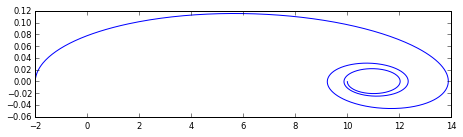

In [5]:
x = np.linspace(0.01,pi,1000)
bb = 6
y = (1+2*b) - np.sin((0.5 + bb)* x ) / np.sin(0.5*x)
z = np.diff(y)
q = np.diff(np.sign(z))
plt.plot(y[1:],z)
np.append(np.insert(q.nonzero(), 0,0),1000)
get_branch_extents(bb)

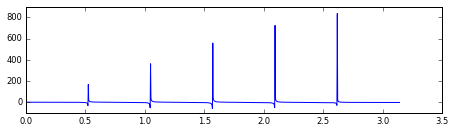

In [6]:
plt.plot(x, 1/(sin(x*bb)/sin(x*(bb+1))) - 1/(bb / (bb+1)))